In [58]:
## import the required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from khmernltk import word_tokenize

In [59]:
raw_text = "តាមរយៈប្រវត្តិសាស្ត្រ សៀវភៅមានដោយកម្រ ហើយជារបស់មានតម្លៃណាស់គេរក្សាវានៅក្នុងបណ្ណាល័យ បុព្វជិត ឬផ្ទះទ្រព្យសម្បត្តិ ។ សៀវភៅនិមួយៗគេចម្លងដោយដៃជាមួយនឹងបិច និងទឹកខ្មៅ ដូច្នេះ មានមនុស្សតិចណាស់មាន វាសនារៀន និងអាន ។ ឆ្មាព្រៃមានការគម្រាមកំហែង តាមរយៈការប្រមាញ់ នៅក្នុងតំបន់ដាច់ស្រយាល ។ "

### Step 1: Create a corpus

In [60]:
## create corpus by lowering the letters and splitting the text by \n
corpus = []
temp_text = ""
ignore_word = [" ", "។"]
for ch in raw_text:
    if ch != "។":
        if ch not in ignore_word:
            temp_text += ch
    else:
        corpus.append(temp_text)
        temp_text = ""
print(corpus)

['តាមរយៈប្រវត្តិសាស្ត្រសៀវភៅមានដោយកម្រហើយជារបស់មានតម្លៃណាស់គេរក្សាវានៅក្នុងបណ្ណាល័យបុព្វជិតឬផ្ទះទ្រព្យសម្បត្តិ', 'សៀវភៅនិមួយៗគេចម្លងដោយដៃជាមួយនឹងបិចនិងទឹកខ្មៅដូច្នេះមានមនុស្សតិចណាស់មានវាសនារៀននិងអាន', 'ឆ្មាព្រៃមានការគម្រាមកំហែងតាមរយៈការប្រមាញ់នៅក្នុងតំបន់ដាច់ស្រយាល']


### Step 2: Train the tokenizer and create word encoding dictionary

In [61]:
tokenize_word = []
for line in corpus:
    tokenize_word = tokenize_word + word_tokenize(line)

# get unique word
tokenize_word = np.array(list(set(tokenize_word)))

#shuffle array of word
np.random.shuffle(tokenize_word)

# calculate vocabulary size + 1 for <oov> token
vocab_size = len(tokenize_word) + 1

print(tokenize_word)
print(vocab_size)

['រៀន' 'ទ្រព្យសម្បត្តិ' 'តិច' 'គេចម្លង' 'នៅក្នុង' 'រក្សា' 'ផ្ទះ' 'កម្រ'
 'ៗ' 'ដាច់ស្រយាល' 'ទឹក' 'វា' 'ដូច្នេះ' 'និមួយ' 'របស់' 'បុព្វជិត'
 'ប្រវត្តិសាស្ត្រ' 'ដោយ' 'ជា' 'វាសនា' 'ឬ' 'តម្លៃ' 'មាន' 'តាមរយៈ' 'ឆ្មា'
 'អាន' 'គេ' 'ណាស់' 'បណ្ណាល័យ' 'ជាមួយនឹង' 'តំបន់' 'ខ្មៅ' 'សៀវភៅ' 'ព្រៃ'
 'ហើយ' 'ការគម្រាមកំហែង' 'បិច' 'ការប្រមាញ់' 'និង' 'មនុស្ស' 'ដៃ']
42


### Step 3: Create N-gram sequence

In [62]:
# create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = word_tokenize(line)
    for i in range(2, len(tokens) + 1):
        temp_array_seq = []
        for word in tokens[: i]:
            temp_array_seq.append(list(tokenize_word).index(word))
        input_sequences.append(temp_array_seq)

print(input_sequences)

[[23, 16], [23, 16, 32], [23, 16, 32, 22], [23, 16, 32, 22, 17], [23, 16, 32, 22, 17, 7], [23, 16, 32, 22, 17, 7, 34], [23, 16, 32, 22, 17, 7, 34, 18], [23, 16, 32, 22, 17, 7, 34, 18, 14], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5, 11], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5, 11, 4], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5, 11, 4, 28], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5, 11, 4, 28, 15], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5, 11, 4, 28, 15, 20], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5, 11, 4, 28, 15, 20, 6], [23, 16, 32, 22, 17, 7, 34, 18, 14, 22, 21, 27, 26, 5, 11, 4, 28, 15, 20, 6, 1], [32, 13], [32, 13, 8], [32, 13, 8, 3], [32, 13, 8, 3, 17], [32, 13, 8, 3

In [63]:
## pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

### Step 4 Extract features and labels

In [105]:
# creating features(x) and label(y)
x = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]
# one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [80]:
print(vocab_size, max_seq_len)

42 21


In [88]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len - 1)
])
model1.weights[0].shape

TensorShape([42, 64])

### Define the LSTM model

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length = max_seq_len - 1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
history = model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 10s 16ms/step - loss: 3.7353 - accuracy: 0.0208
Epoch 2/500
2/2 [==============================] - 0s 18ms/step - loss: 3.7277 - accuracy: 0.0625
Epoch 3/500
2/2 [==============================] - 0s 24ms/step - loss: 3.7213 - accuracy: 0.1042
Epoch 4/500
2/2 [==============================] - 0s 20ms/step - loss: 3.7140 - accuracy: 0.1042
Epoch 5/500
2/2 [==============================] - 0s 18ms/step - loss: 3.7071 - accuracy: 0.1042
Epoch 6/500
2/2 [==============================] - 0s 17ms/step - loss: 3.6999 - accuracy: 0.1042
Epoch 7/500
2/2 [==============================] - 0s 23ms/step - loss: 3.6907 - accuracy: 0.1042
Epoch 8/500
2/2 [==============================] - 0s 19ms/step - loss: 3.6803 - accuracy: 0.1042
Epoch 9/500
2/2 [==============================] - 0s 21ms/step - loss: 3.6717 - accuracy: 0.1042
Epoch 10/500
2/2 [==============================] - 0s 25ms/step - loss: 3.6588 - accuracy: 0.1042
Epoch 11/500
2/2 [

### Visualize metrics

In [66]:
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.show()

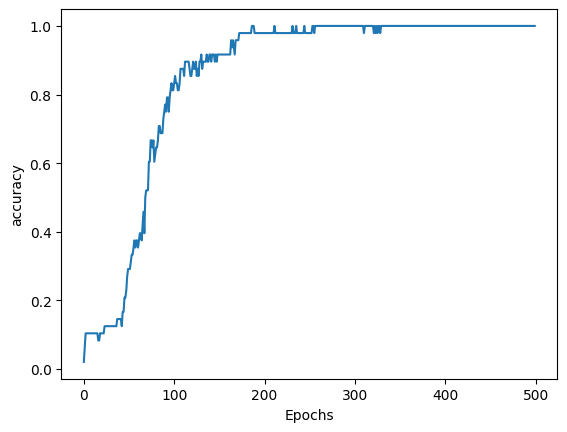

In [67]:
plot_metric(history=history, metric='accuracy')

### Generate new text

In [68]:
seed_text = "ទឹកខ្មៅ"

seed_text = [seed_text]

test_sequence = []

for line in seed_text:
    tokens = word_tokenize(line)
    for i in range(2, len(tokens) + 1):
        temp_array_seq = []
        for word in tokens[: i]:
            temp_array_seq.append(list(tokenize_word).index(word))
        test_sequence.append(temp_array_seq)

# tokenlist = tokenizer.texts_to_sequences([seed_text])
token_pad = pad_sequences(test_sequence, maxlen=max_seq_len - 1, padding='pre')
predictd = model.predict(token_pad, verbose=0)
print(np.max(predictd), np.argmax(predictd, axis=-1))

0.9299818 [22]


In [95]:
x = "Hiu"
y = "hyu"
print( x + y)

Hiuhyu


In [100]:
def text_to_sequence(text, tokenize_word):
    text_seq = []
    for line in [text]:
        tokens = word_tokenize(line)
        for i in range(2, len(tokens) + 1):
            temp_array_seq = []
            previous_word = ""
            for word in tokens[: i]:
                if word not in ignore_word:
                    if word in tokenize_word:
                        temp_array_seq.append(list(tokenize_word).index(word))
                    else:
                        temp_array_seq.append(list(tokenize_word).index(previous_word + word))
                previous_word = word
            text_seq.append(temp_array_seq)
    return text_seq[-1]

In [104]:
seed_text = "ទឹកខ្មៅ"


## add number of words you want to predict
next_words = 25

## run the loop to predict and concatenate the word

for _ in range(next_words):
    token_list = text_to_sequence(seed_text, tokenize_word)
    token_pad = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
    # predict the class using the trained model
    predicted = model.predict(token_pad, verbose=0)
    higest_prediction = np.argmax(predicted)
    output_word = ""
    for word in tokenize_word:
        # reference the predicted class with the vocabulary
        if higest_prediction == list(tokenize_word).index(word):
            output_word = word
            break
    
    seed_text += " " + output_word
print(seed_text)

ទឹកខ្មៅ និមួយ ៗ គេចម្លង ដៃ ជាមួយនឹង បិច និង ខ្មៅ ដូច្នេះ មាន មនុស្ស តិច ណាស់ មាន វាសនា រៀន និង អាន អាន អាន និង រៀន និង និង អាន


In [102]:
print(corpus)

['តាមរយៈប្រវត្តិសាស្ត្រសៀវភៅមានដោយកម្រហើយជារបស់មានតម្លៃណាស់គេរក្សាវានៅក្នុងបណ្ណាល័យបុព្វជិតឬផ្ទះទ្រព្យសម្បត្តិ', 'សៀវភៅនិមួយៗគេចម្លងដោយដៃជាមួយនឹងបិចនិងទឹកខ្មៅដូច្នេះមានមនុស្សតិចណាស់មានវាសនារៀននិងអាន', 'ឆ្មាព្រៃមានការគម្រាមកំហែងតាមរយៈការប្រមាញ់នៅក្នុងតំបន់ដាច់ស្រយាល']
